# Langkah 0 - Import Library

In [ ]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [13]:
# Image directories
train_dir = "/content/drive/MyDrive/JS Machine Learning/JS11 - Klasifikasi 2/images/training"
test_dir = "/content/drive/MyDrive/JS Machine Learning/JS11 - Klasifikasi 2/images/test"

# Langkah 1 - Load Data dan Visualisasikan

In [14]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [15]:
# Load training data
train_img = load_dataset(train_dir)

In [16]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[23, 24, 16],
         [19, 20, 12],
         [17, 18, 10],
         ...,
         [ 9,  6,  0],
         [16, 13,  6],
         [21, 18, 11]],
 
        [[58, 59, 51],
         [51, 52, 44],
         [48, 49, 41],
         ...,
         [35, 32, 25],
         [36, 33, 26],
         [37, 34, 27]],
 
        [[59, 60, 52],
         [50, 51, 43],
         [46, 47, 39],
         ...,
         [37, 34, 27],
         [35, 32, 25],
         [33, 30, 23]],
 
        ...,
 
        [[71, 77, 65],
         [71, 77, 65],
         [72, 78, 66],
         ...,
         [34, 49, 42],
         [38, 55, 47],
         [41, 58, 50]],
 
        [[70, 76, 64],
         [71, 77, 65],
         [72, 78, 66],
         ...,
         [39, 54, 47],
         [41, 56, 49],
         [42, 59, 51]],
 
        [[73, 79, 69],
         [76, 82, 72],
         [77, 83, 73],
         ...,
         [39, 52, 43],
         [39, 52, 43],
         [38, 54, 44]]], dtype=uint8),
 'night')

In [17]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 46
(469, 640, 3)


In [18]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (469, 640, 3)
Label	: night


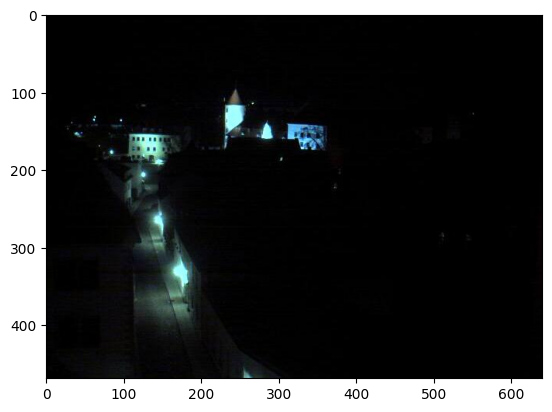

In [20]:
random_img_viz(train_img)

# Langkah 3 - Pra Pengolahan Data

In [21]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [22]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

In [23]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [24]:
train_std_img_list = preprocess(train_img)

In [25]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 29
(600, 1100, 3)


# Langkah 4 - Ekstraksi Fitur

In [26]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Image 95
Avg Brighness: 111.4930


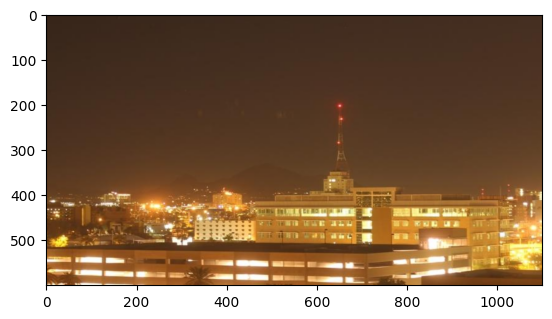

In [27]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

# Langkah 5 - Klasifikasi dengan Metode Threshold

In [28]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Image 82
Actual label: 0
Predicted label: 0


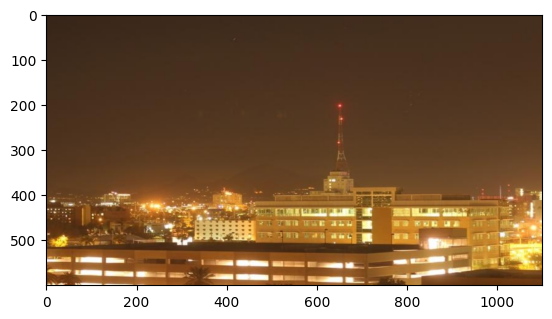

In [29]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

# Langkah 6 - Evaluasi Manual

In [30]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [31]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


In [32]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


# Langkah 4 Alternatif - Membuat Feature Vectors.

In [33]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [34]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,84.335327,0.0
1,39.326377,0.0
2,99.679486,0.0
3,95.466691,0.0
4,85.889741,0.0


In [35]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,98.980126,0.0
1,32.609429,0.0
2,89.473241,0.0
3,93.822077,0.0
4,176.830915,0.0


# Langkah 5 - Buat Model SVM

In [36]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

# Langkah 6 - Evaluasi

In [37]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


# NO 2 TUGAS PRAKTIKUM

In [38]:
def extract_histogram_feature(image, bins=32):
    """
    Menghitung histogram HSV (Value/Brightness channel) sebagai feature vector.
    """
    # 1. Konversi ke HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    # Ambil channel V (Value/Brightness), ini adalah fitur yang paling relevan
    v_channel = img_hsv[:,:,2]

    # 2. Hitung Histogram
    # Menggunakan bins = 32 atau 64 umumnya baik untuk feature vector
    hist = cv2.calcHist([v_channel], [0], None, [bins], [0, 256])

    # 3. Normalisasi (penting untuk perbandingan fitur)
    cv2.normalize(hist, hist, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

    # Flatten array dan kembalikan
    return hist.flatten()

def extract_hist_feature_vector(img_list, bins=32):
    """
    Ekstraksi fitur histogram untuk seluruh daftar gambar.
    """
    feature_list = []
    labels = []

    for img in img_list:
        # Ekstrak fitur histogram
        hist_vec = extract_histogram_feature(img[0], bins=bins)

        feature_list.append(hist_vec)
        labels.append(img[1])

    # Gabungkan menjadi Pandas DataFrame
    X_hist = np.array(feature_list)
    y_label = np.array(labels)

    return X_hist, y_label

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Ekstrak fitur histogram dari gabungan data train dan test yang sudah dipreproses
# Menggabungkan data karena tugas meminta rasio split 80:20 dari keseluruhan dataset.

# 1. Gabungkan semua data berlabel
all_std_img_list = train_std_img_list + test_std_img_list

# 2. Ekstrak fitur histogram
X_hist, y_label = extract_hist_feature_vector(all_std_img_list, bins=64)

# Konversi label ke integer (dari float)
y_label = y_label.astype(int)

print(f"Bentuk Fitur (X_hist): {X_hist.shape}")
print(f"Bentuk Label (y_label): {y_label.shape}")

# 3. Standardisasi Fitur
scaler = StandardScaler()
X_hist_scaled = scaler.fit_transform(X_hist)

# 4. Split Data 80:20 (Training:Testing)
X_train_hist, X_test_hist, y_train_hist, y_test_hist = train_test_split(
    X_hist_scaled, y_label, test_size=0.2, random_state=42, stratify=y_label
)

print(f"\nJumlah data Training (80%): {X_train_hist.shape[0]}")
print(f"Jumlah data Testing (20%): {X_test_hist.shape[0]}")

Bentuk Fitur (X_hist): (400, 64)
Bentuk Label (y_label): (400,)

Jumlah data Training (80%): 320
Jumlah data Testing (20%): 80


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Tentukan range hyperparameter yang akan diuji
# C: parameter regularisasi
# gamma: koefisien kernel RBF
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf'] # Pastikan menggunakan kernel RBF
}

# 2. Inisialisasi Model Dasar
svm_rbf = SVC(random_state=42)

# 3. Inisialisasi GridSearchCV
# cv=5 berarti 5-fold cross-validation
print("Mulai mencari hyperparameter terbaik...")
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Latih Grid Search (mencari parameter terbaik)
grid_search.fit(X_train_hist, y_train_hist)

# 4. Dapatkan parameter dan akurasi terbaik
best_params = grid_search.best_params_
# best_score = grid_search.best_score_ # Akurasi pada data cross-validation
best_model = grid_search.best_estimator_

# 5. Evaluasi pada data Test (20% data)
y_test_pred = best_model.predict(X_test_hist)
final_accuracy = accuracy_score(y_test_hist, y_test_pred)

print(f"\n========================================================")
print(f"✅ Hasil Hyperparameter Tuning (SVM Kernel RBF):")
print(f"   Parameter Terbaik: {best_params}")
print(f"   Akurasi Final pada Data Test (Rasio 80:20): {final_accuracy:.4f}")
print(f"========================================================")

Mulai mencari hyperparameter terbaik...

✅ Hasil Hyperparameter Tuning (SVM Kernel RBF):
   Parameter Terbaik: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
   Akurasi Final pada Data Test (Rasio 80:20): 0.9750
